In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [2]:
data = {
    'time_of_game': [12, 15, 18, 20, 21, 22, 23, 10, 14, 16],
    'num_people': [100, 200, 300, 400, 500, 600, 700, 150, 250, 350],
    'bathroom_crowd': [10, 30, 45, 60, 75, 85, 90, 20, 40, 55],
    'restaurant_crowd': [20, 40, 60, 80, 100, 110, 120, 30, 50, 70]
}

In [3]:
df = pd.DataFrame(data)

# Add new features to improve model accuracy
df['time_squared'] = df['time_of_game'] ** 2  # Add squared time as a feature
df['people_per_hour'] = df['num_people'] / df['time_of_game']  # People per hour
df['interaction'] = df['time_of_game'] * df['num_people']  # Interaction between time and people

# Display data after feature engineering
print("Data after feature engineering:")
print(df.head())
print("\nData statistics:")
print(df.describe())


Data after feature engineering:
   time_of_game  num_people  bathroom_crowd  restaurant_crowd  time_squared  \
0            12         100              10                20           144   
1            15         200              30                40           225   
2            18         300              45                60           324   
3            20         400              60                80           400   
4            21         500              75               100           441   

   people_per_hour  interaction  
0         8.333333         1200  
1        13.333333         3000  
2        16.666667         5400  
3        20.000000         8000  
4        23.809524        10500  

Data statistics:
       time_of_game  num_people  bathroom_crowd  restaurant_crowd  \
count     10.000000   10.000000       10.000000         10.000000   
mean      17.100000  355.000000       51.000000         68.000000   
std        4.408325  196.426407       27.059605         34.25395

Text(0.5, 1.0, 'Correlation Matrix')

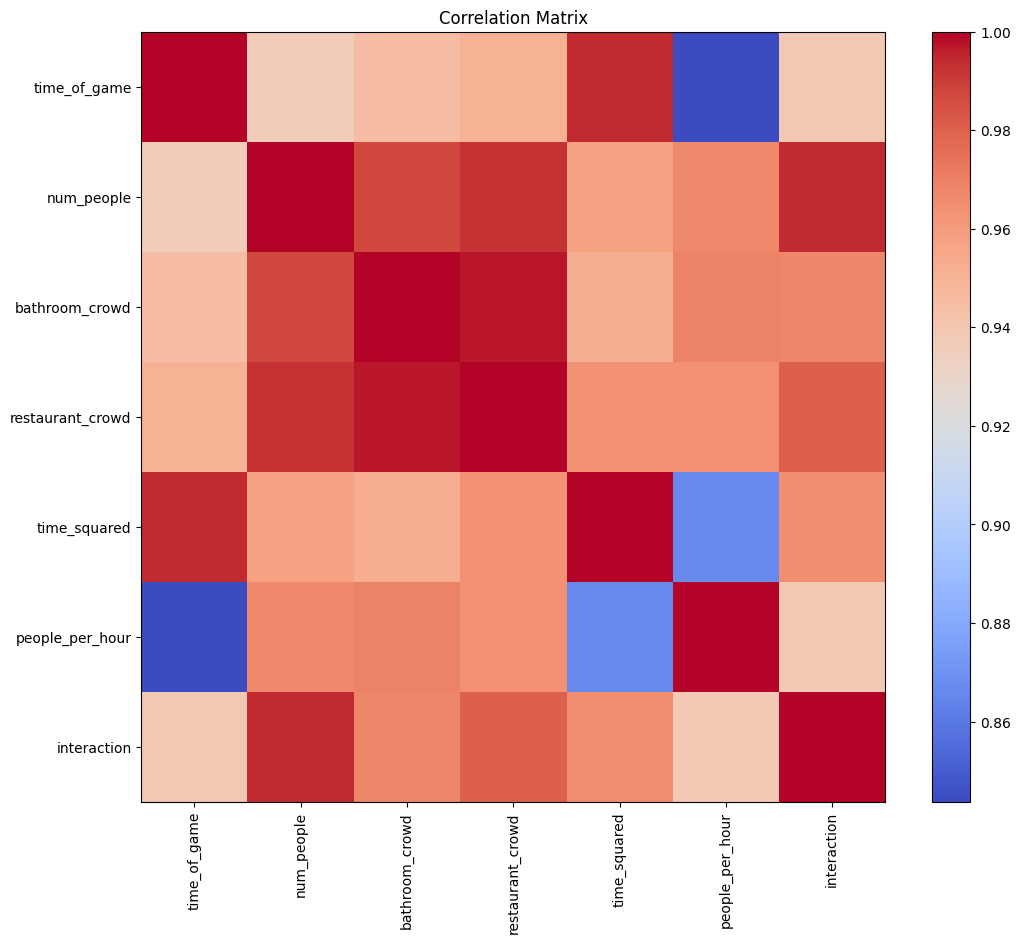

In [4]:
plt.figure(figsize=(12, 10))
correlation = df.corr()
plt.imshow(correlation, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation)), correlation.columns)
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'Correlation Matrix')

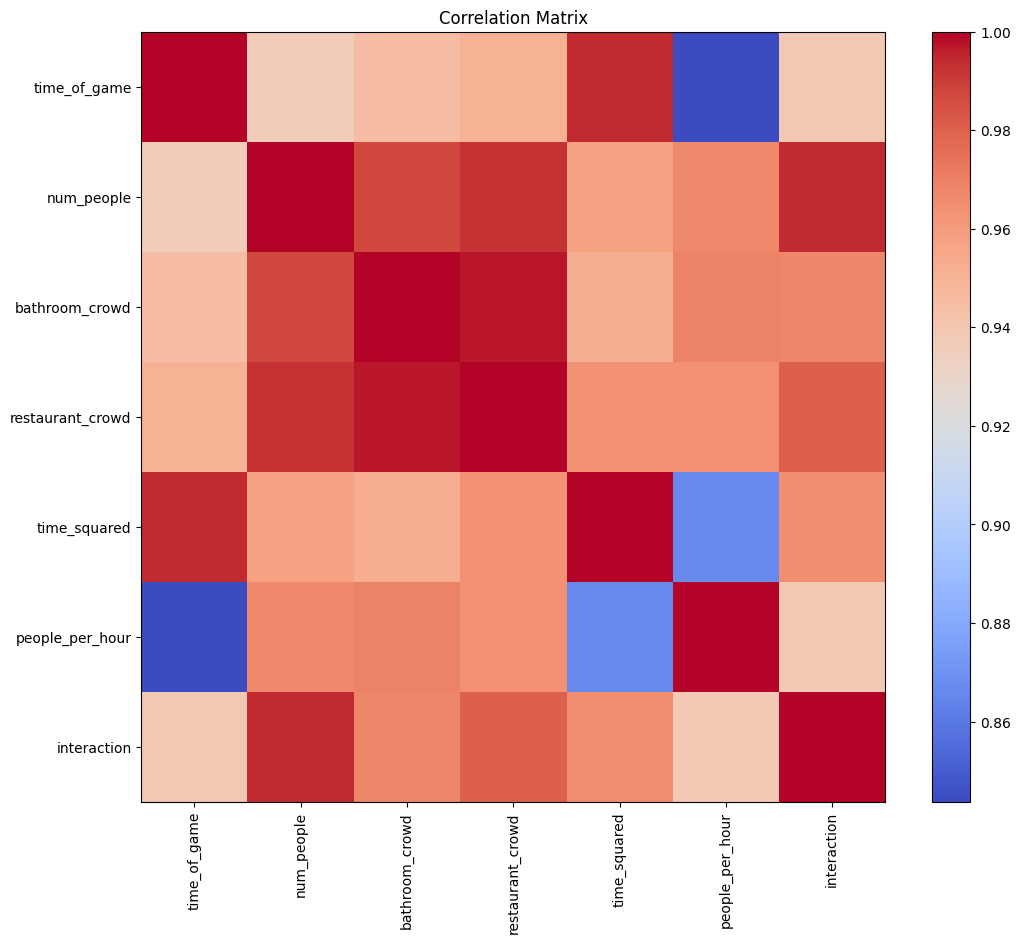

In [5]:
plt.figure(figsize=(12, 10))
correlation = df.corr()
plt.imshow(correlation, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation)), correlation.columns)
plt.title('Correlation Matrix')

<ipython-input-6-2a39bba515be>:5: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


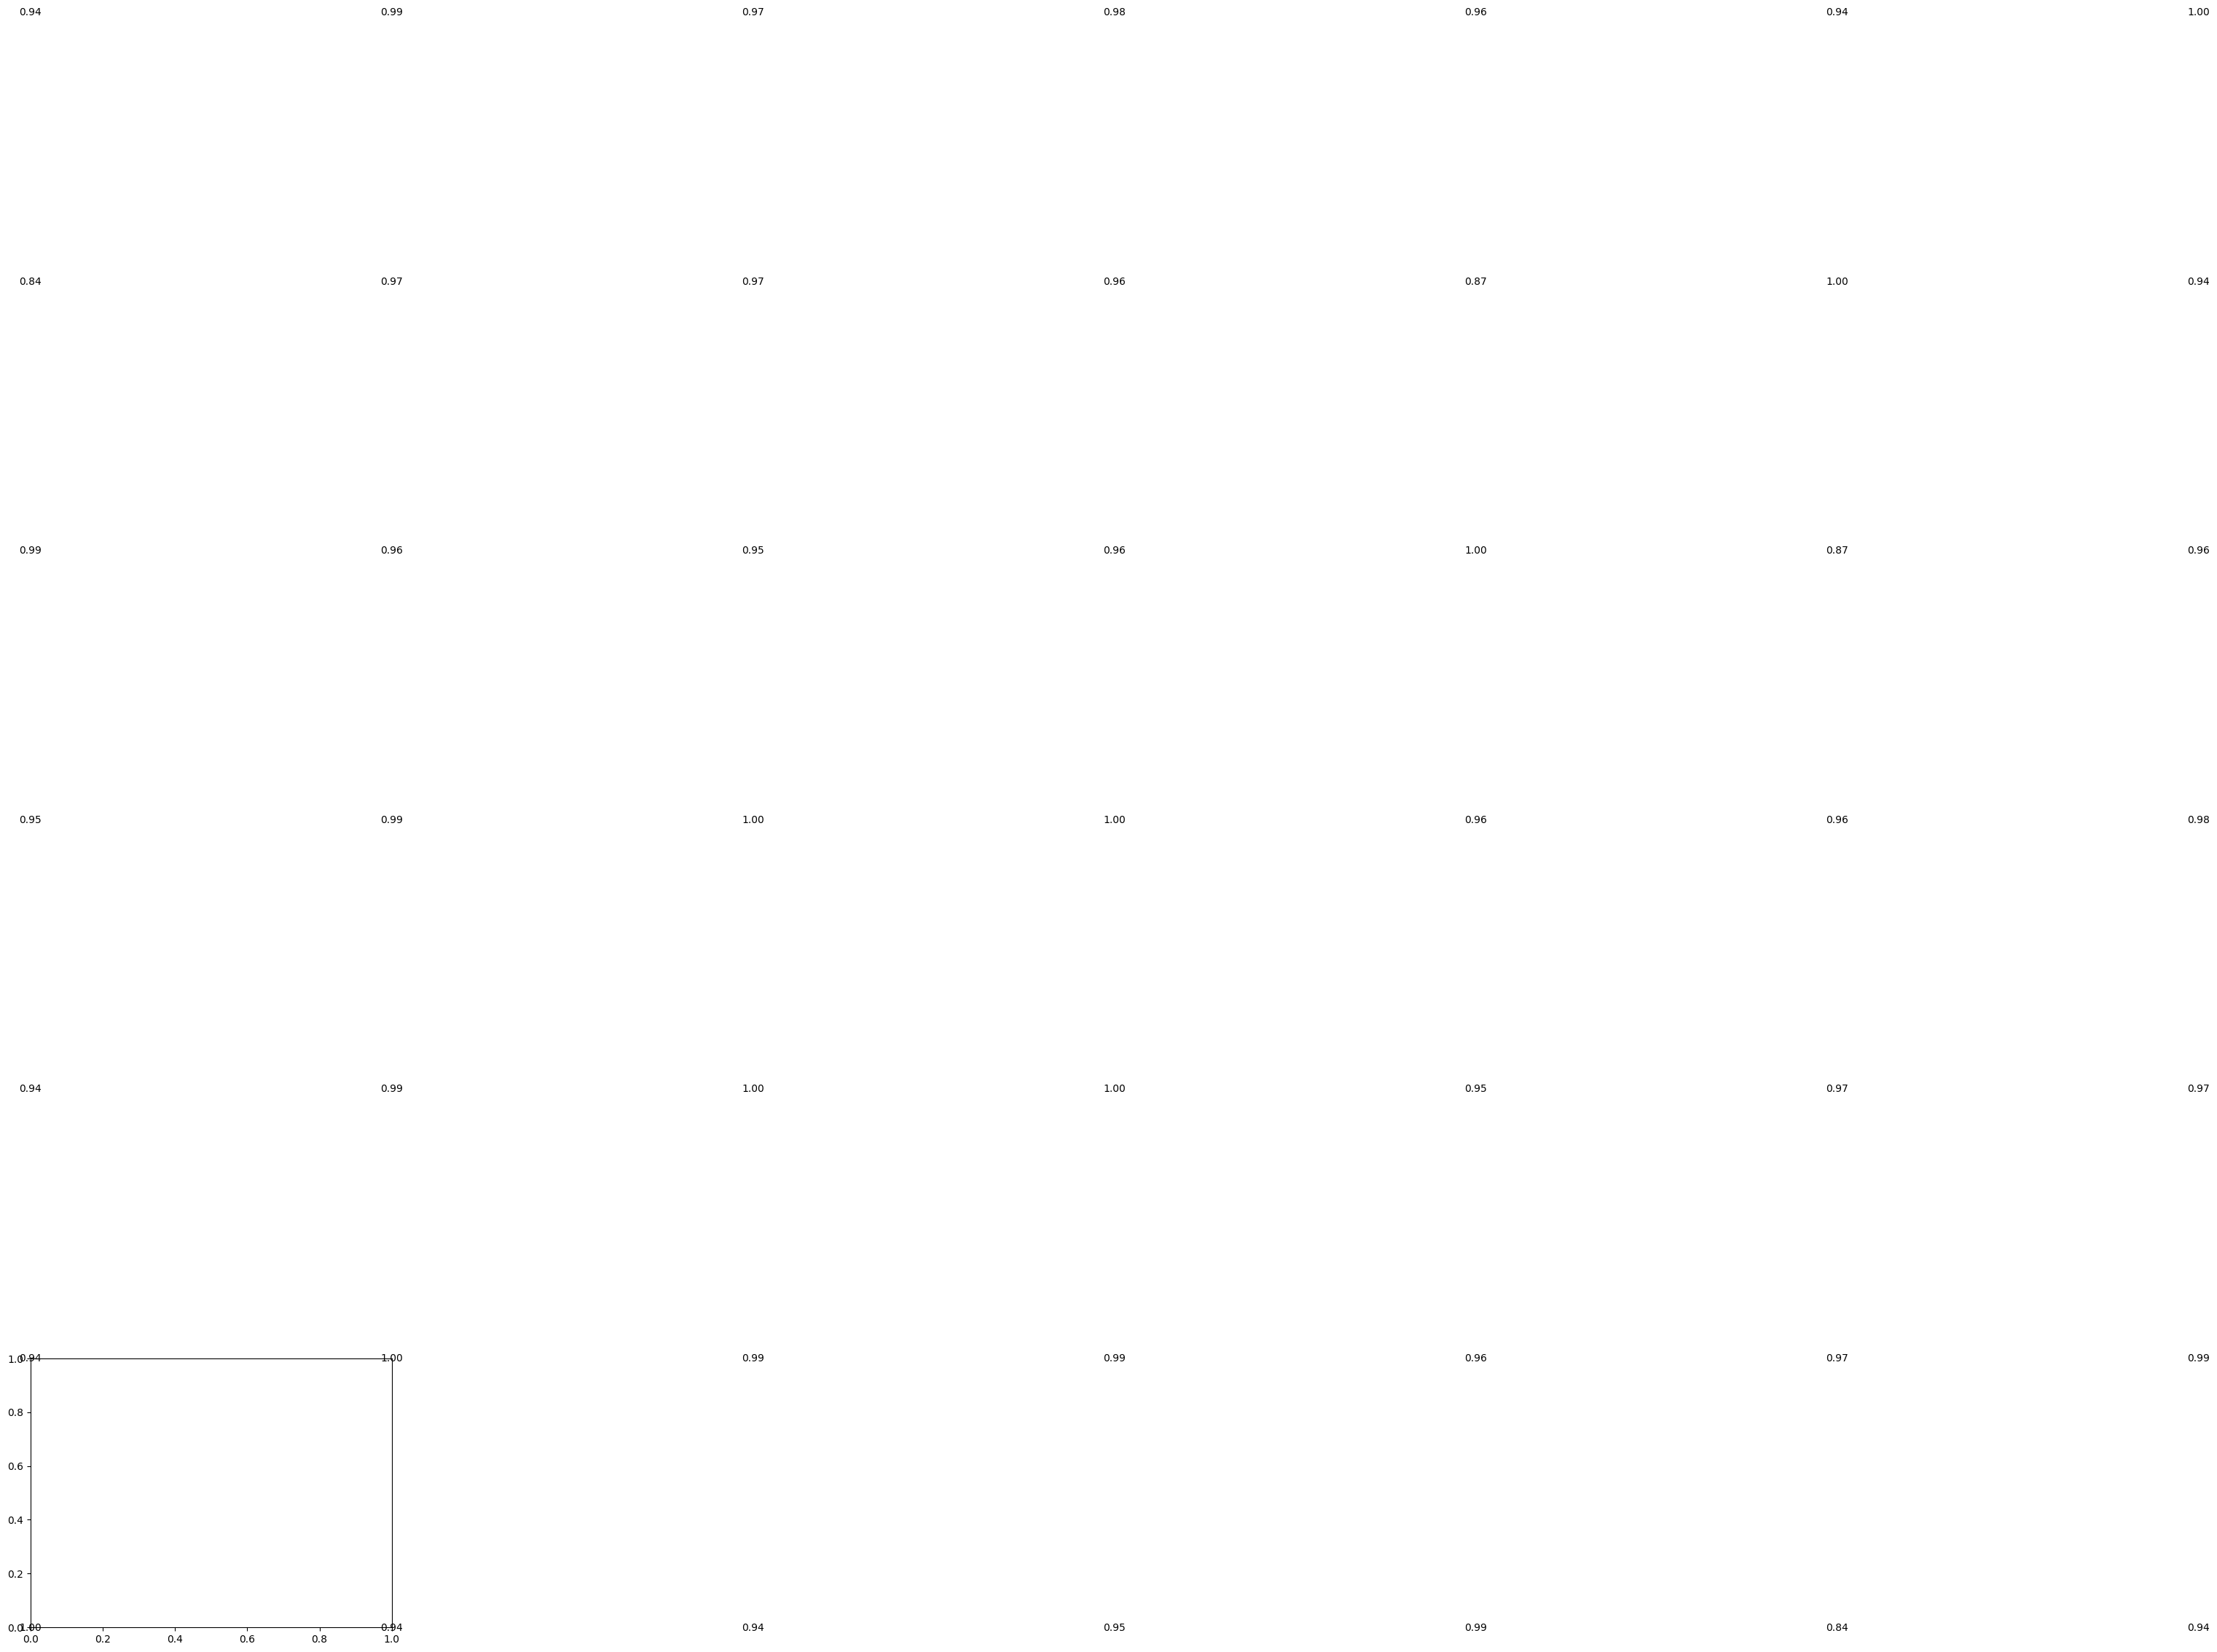

In [6]:
for i in range(len(correlation)):
    for j in range(len(correlation)):
        plt.text(j, i, f'{correlation.iloc[i, j]:.2f}',
                 ha='center', va='center', color='black')
plt.tight_layout()
plt.show()

In [7]:
features = ['time_of_game', 'num_people', 'time_squared', 'people_per_hour', 'interaction']
X = df[features]
y_bathroom = df['bathroom_crowd']
y_restaurant = df['restaurant_crowd']


In [8]:
X_train, X_test, y_train_bathroom, y_test_bathroom = train_test_split(
    X, y_bathroom, test_size=0.2, random_state=42)
_, _, y_train_restaurant, y_test_restaurant = train_test_split(
    X, y_restaurant, test_size=0.2, random_state=42)


In [9]:
print("\nData split complete:")
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")

# --- Model 1: Advanced Linear Model with Ridge Regularization ---
print("\n--- Model 1: Advanced Linear Model with Ridge Regularization ---")



Data split complete:
Training set size: 8 rows
Test set size: 2 rows

--- Model 1: Advanced Linear Model with Ridge Regularization ---


In [10]:
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge(alpha=1.0))
])

In [11]:
ridge_model_bathroom = ridge_pipeline.fit(X_train, y_train_bathroom)
ridge_model_restaurant = ridge_pipeline.fit(X_train, y_train_restaurant)

# Make predictions
y_pred_bathroom_ridge = ridge_model_bathroom.predict(X_test)
y_pred_restaurant_ridge = ridge_model_restaurant.predict(X_test)


In [12]:
print("Ridge Model Evaluation:")
print(f"Bathroom Model R² Score: {r2_score(y_test_bathroom, y_pred_bathroom_ridge):.4f}")
print(f"Bathroom Model MSE: {mean_squared_error(y_test_bathroom, y_pred_bathroom_ridge):.4f}")
print(f"Restaurant Model R² Score: {r2_score(y_test_restaurant, y_pred_restaurant_ridge):.4f}")
print(f"Restaurant Model MSE: {mean_squared_error(y_test_restaurant, y_pred_restaurant_ridge):.4f}")

# --- Model 2: Random Forest Regressor ---
print("\n--- Model 2: Random Forest Regressor ---")

Ridge Model Evaluation:
Bathroom Model R² Score: -5.4986
Bathroom Model MSE: 162.4652
Restaurant Model R² Score: 0.6609
Restaurant Model MSE: 8.4786

--- Model 2: Random Forest Regressor ---


In [13]:
rf_model_bathroom = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model_bathroom.fit(X_train, y_train_bathroom)

rf_model_restaurant = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model_restaurant.fit(X_train, y_train_restaurant)

# Make predictions
y_pred_bathroom_rf = rf_model_bathroom.predict(X_test)
y_pred_restaurant_rf = rf_model_restaurant.predict(X_test)


In [14]:
print("Random Forest Model Evaluation:")
print(f"Bathroom Model R² Score: {r2_score(y_test_bathroom, y_pred_bathroom_rf):.4f}")
print(f"Bathroom Model MSE: {mean_squared_error(y_test_bathroom, y_pred_bathroom_rf):.4f}")
print(f"Restaurant Model R² Score: {r2_score(y_test_restaurant, y_pred_restaurant_rf):.4f}")
print(f"Restaurant Model MSE: {mean_squared_error(y_test_restaurant, y_pred_restaurant_rf):.4f}")
print("\n--- Model 3: Gradient Boosting Regressor ---")


Random Forest Model Evaluation:
Bathroom Model R² Score: -0.1234
Bathroom Model MSE: 28.0862
Restaurant Model R² Score: 0.7804
Restaurant Model MSE: 5.4900

--- Model 3: Gradient Boosting Regressor ---


In [15]:
gb_model_bathroom = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model_bathroom.fit(X_train, y_train_bathroom)

gb_model_restaurant = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model_restaurant.fit(X_train, y_train_restaurant)

# Make predictions
y_pred_bathroom_gb = gb_model_bathroom.predict(X_test)
y_pred_restaurant_gb = gb_model_restaurant.predict(X_test)

In [16]:
print("Gradient Boosting Model Evaluation:")
print(f"Bathroom Model R² Score: {r2_score(y_test_bathroom, y_pred_bathroom_gb):.4f}")
print(f"Bathroom Model MSE: {mean_squared_error(y_test_bathroom, y_pred_bathroom_gb):.4f}")
print(f"Restaurant Model R² Score: {r2_score(y_test_restaurant, y_pred_restaurant_gb):.4f}")
print(f"Restaurant Model MSE: {mean_squared_error(y_test_restaurant, y_pred_restaurant_gb):.4f}")

Gradient Boosting Model Evaluation:
Bathroom Model R² Score: -3.1552
Bathroom Model MSE: 103.8802
Restaurant Model R² Score: 0.9128
Restaurant Model MSE: 2.1799


In [17]:
models = ['Ridge', 'Random Forest', 'Gradient Boosting']
bathroom_r2 = [
    r2_score(y_test_bathroom, y_pred_bathroom_ridge),
    r2_score(y_test_bathroom, y_pred_bathroom_rf),
    r2_score(y_test_bathroom, y_pred_bathroom_gb)
]
restaurant_r2 = [
    r2_score(y_test_restaurant, y_pred_restaurant_ridge),
    r2_score(y_test_restaurant, y_pred_restaurant_rf),
    r2_score(y_test_restaurant, y_pred_restaurant_gb)
]

<ipython-input-18-ad6c0528f46d>:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


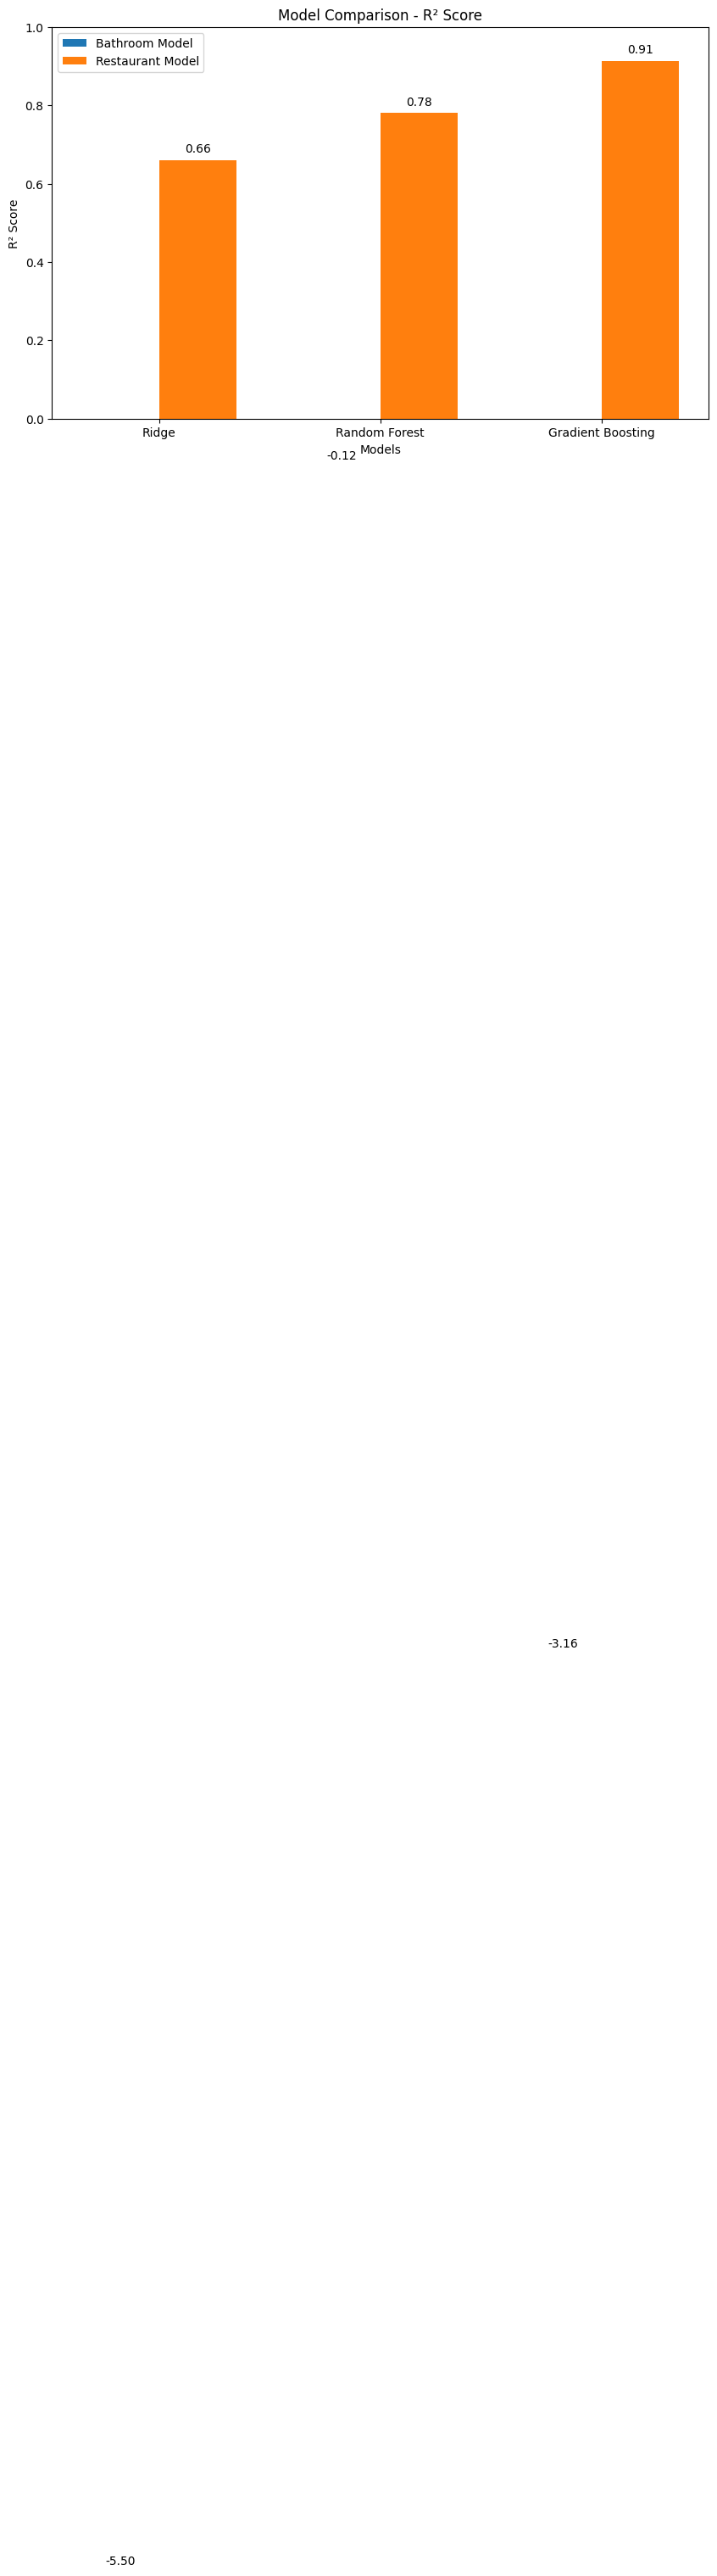

In [18]:
# Plot model comparison
plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.35
plt.bar(x - width/2, bathroom_r2, width, label='Bathroom Model')
plt.bar(x + width/2, restaurant_r2, width, label='Restaurant Model')

plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('Model Comparison - R² Score')
plt.xticks(x, models)
plt.legend()
plt.ylim(0, 1)

for i, v in enumerate(bathroom_r2):
    plt.text(i - width/2, v + 0.02, f'{v:.2f}', ha='center')

for i, v in enumerate(restaurant_r2):
    plt.text(i + width/2, v + 0.02, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.show()



Best model for bathroom crowd prediction: Random Forest
Best model for restaurant crowd prediction: Gradient Boosting


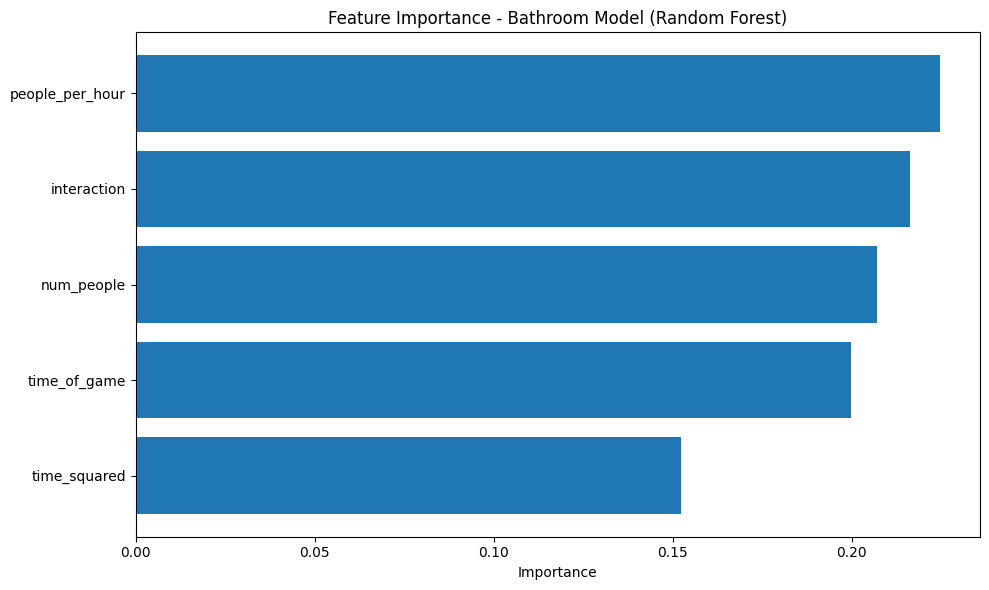


Making predictions with the best models:


In [19]:
best_bathroom_model_index = np.argmax(bathroom_r2)
best_restaurant_model_index = np.argmax(restaurant_r2)

print(f"\nBest model for bathroom crowd prediction: {models[best_bathroom_model_index]}")
print(f"Best model for restaurant crowd prediction: {models[best_restaurant_model_index]}")

# Feature importance analysis for the best models
if best_bathroom_model_index == 0:  # Ridge
    # Extract feature importance from Ridge coefficients
    coef = ridge_model_bathroom.named_steps['ridge'].coef_
    # Get feature names after polynomial transformation
    feature_names = ridge_model_bathroom.named_steps['poly'].get_feature_names_out(features)
    # Create a DataFrame for visualization
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': np.abs(coef)})
    importance_df = importance_df.sort_values('Importance', ascending=False)

    plt.figure(figsize=(12, 6))
    plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
    plt.xlabel('Importance')
    plt.title('Top 10 Feature Importance - Bathroom Model (Ridge)')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

else:  # Random Forest or Gradient Boosting
    best_bathroom_model = [rf_model_bathroom, gb_model_bathroom][best_bathroom_model_index - 1]

    # Get feature importance
    importances = best_bathroom_model.feature_importances_
    # Create a DataFrame for visualization
    importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
    importance_df = importance_df.sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel('Importance')
    plt.title(f'Feature Importance - Bathroom Model ({models[best_bathroom_model_index]})')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Use the best model for predictions
print("\nMaking predictions with the best models:")

In [20]:
best_bathroom_model = [
    ridge_model_bathroom,
    rf_model_bathroom,
    gb_model_bathroom
][best_bathroom_model_index]

best_restaurant_model = [
    ridge_model_restaurant,
    rf_model_restaurant,
    gb_model_restaurant
][best_restaurant_model_index]

# New data for predictions
new_times = [13, 17, 19]
new_people = [250, 350, 450]


In [21]:
for time, people in zip(new_times, new_people):
    # Create a new data point with all features
    new_data = pd.DataFrame({
        'time_of_game': [time],
        'num_people': [people],
        'time_squared': [time ** 2],
        'people_per_hour': [people / time],
        'interaction': [time * people]
    })

In [22]:
bathroom_pred = best_bathroom_model.predict(new_data)[0]
restaurant_pred = best_restaurant_model.predict(new_data)[0]

print(f"Game time: {time}, Number of people: {people}")
print(f"Predicted bathroom crowd: {bathroom_pred:.1f}")
print(f"Predicted restaurant crowd: {restaurant_pred:.1f}")
print("---")

Game time: 19, Number of people: 450
Predicted bathroom crowd: 63.4
Predicted restaurant crowd: 78.8
---


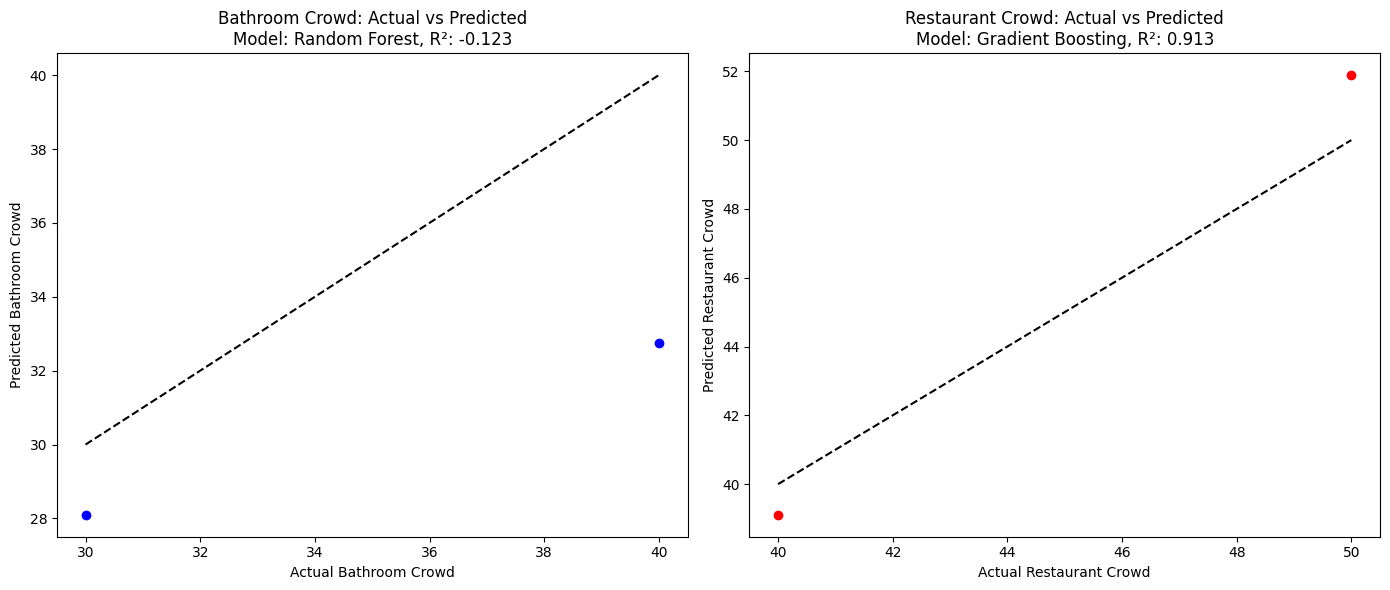

In [23]:
plt.figure(figsize=(14, 6))

# Bathroom predictions with the best model
y_pred_bathroom_best = best_bathroom_model.predict(X_test)

plt.subplot(1, 2, 1)
plt.scatter(y_test_bathroom, y_pred_bathroom_best, color='blue')
plt.plot([min(y_test_bathroom), max(y_test_bathroom)],
         [min(y_test_bathroom), max(y_test_bathroom)], 'k--')
plt.xlabel('Actual Bathroom Crowd')
plt.ylabel('Predicted Bathroom Crowd')
plt.title(f'Bathroom Crowd: Actual vs Predicted\nModel: {models[best_bathroom_model_index]}, R²: {bathroom_r2[best_bathroom_model_index]:.3f}')

# Restaurant predictions with the best model
y_pred_restaurant_best = best_restaurant_model.predict(X_test)

plt.subplot(1, 2, 2)
plt.scatter(y_test_restaurant, y_pred_restaurant_best, color='red')
plt.plot([min(y_test_restaurant), max(y_test_restaurant)],
         [min(y_test_restaurant), max(y_test_restaurant)], 'k--')
plt.xlabel('Actual Restaurant Crowd')
plt.ylabel('Predicted Restaurant Crowd')
plt.title(f'Restaurant Crowd: Actual vs Predicted\nModel: {models[best_restaurant_model_index]}, R²: {restaurant_r2[best_restaurant_model_index]:.3f}')

plt.tight_layout()
plt.show()